# 타이타닉 생존자 예측을 위한 EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

In [4]:
import seaborn as sns
df = sns.load_dataset("titanic")
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_percent

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [8]:
# TODO: Pandas 경고는 수정해야 됨
## df["age"] == SELECT AGE FROM DF
#df["age"].fillna(df["age"].mean(), inplace=True) # 원본을 건드리는 것임 -> 하지 마세요
df["age"] = df["age"].fillna(df["age"].mean()) # 이렇게 수정
#df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)
df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])# 이렇게 수정

## 생존자 현황

In [9]:
survived_count = df["survived"].value_counts()
survived_rate = df["survived"].mean()
print(f"생존자: {survived_count[1]}명")
print(f"사망자: {survived_count[0]}명")
print(f"생존율: {survived_rate:.2%}")

생존자: 342명
사망자: 549명
생존율: 38.38%


(survived    0    1
 sex               
 female     81  233
 male      468  109,
 <Axes: xlabel='sex'>)

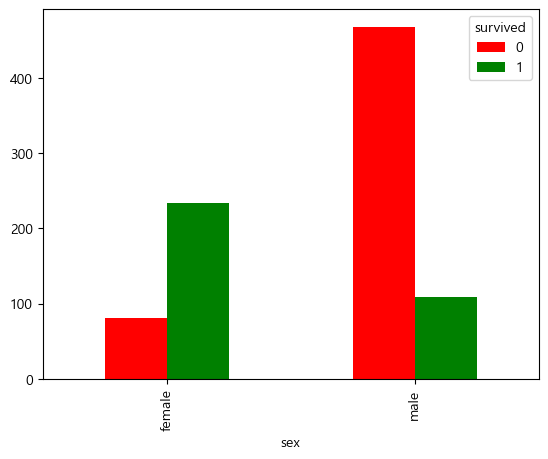

In [10]:
gender_survival_counts = pd.crosstab(df["sex"], df["survived"]) # 앞에 있는 값이 x축이 됨
gender_survival_counts, gender_survival_counts.plot(kind="bar", color=["red", "green"])

<Axes: xlabel='sex', ylabel='count'>

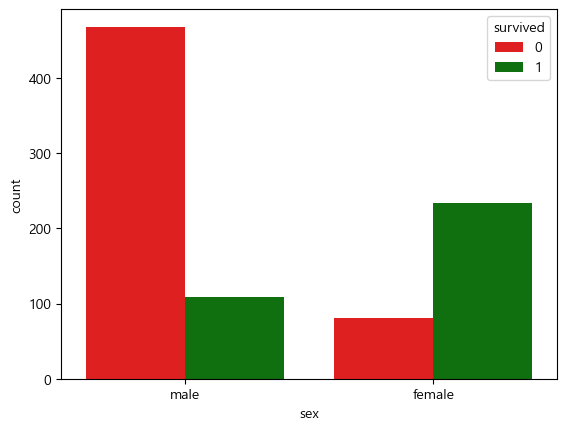

In [11]:
sns.countplot(data = df, x='sex', hue= "survived", palette=['red','green']) ## ->> hue의 역할에 대해 이해하기

### 1. 타이타닉 : 성별에 따른 생존률 분석

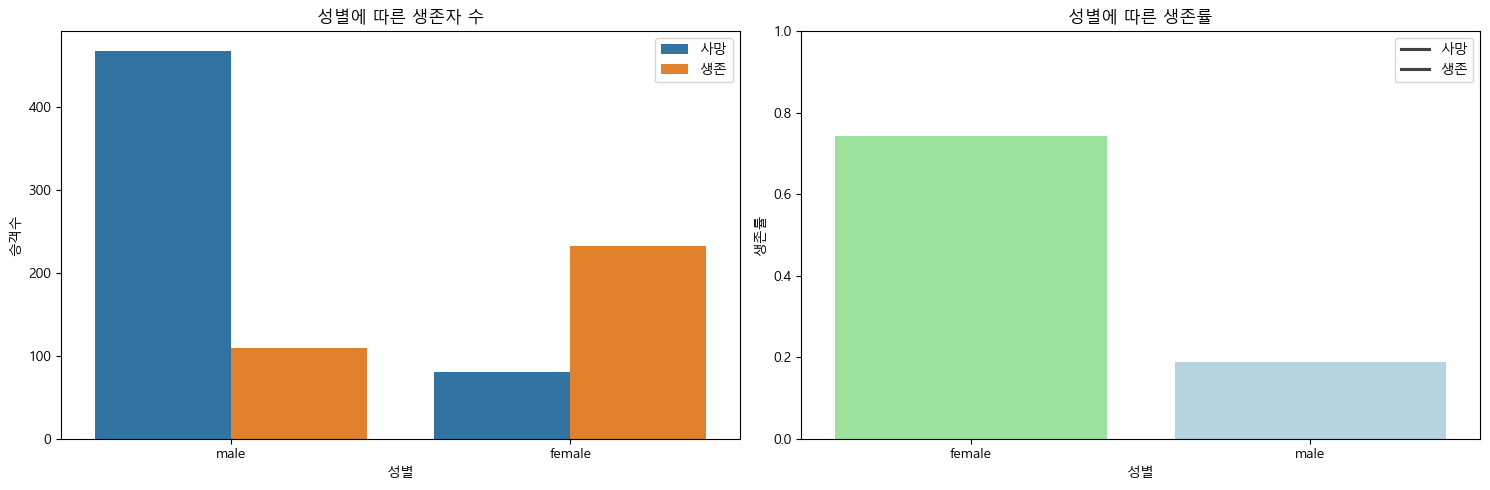

In [12]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data = df, x='sex', hue= "survived", ax = axes[0])
axes[0].set_title("성별에 따른 생존자 수")
axes[0].set_xlabel("성별")
axes[0].set_ylabel("승객수")
axes[0].legend(labels=["사망", "생존"])

# 성별에 따른 생존률** 숫자보다 생존률이 더 중요함***
sex_survived = df.groupby("sex")["survived"].mean().reset_index() ## 여기도 다시 이해하기 groupby =>> 집계함수
sns.barplot( data=sex_survived, x='sex', y= "survived", hue= "survived", ax = axes[1], palette=["lightblue", "lightgreen"])
axes[1].set_title("성별에 따른 생존률")
axes[1].set_xlabel("성별")
axes[1].set_ylabel("생존률")
axes[1].legend(labels=["사망", "생존"])
axes[1].set_ylim(0,1)

plt.tight_layout()
plt.show()

### 2. 타이타닉 : 승객 등급에 따른 생존률 분석
- 등급별 생존자 수
- 등급별 생존률
- 등급과 성별 교차율

##### 데이터를 받으면 먼저 독립변인이 뭔지 확인하기

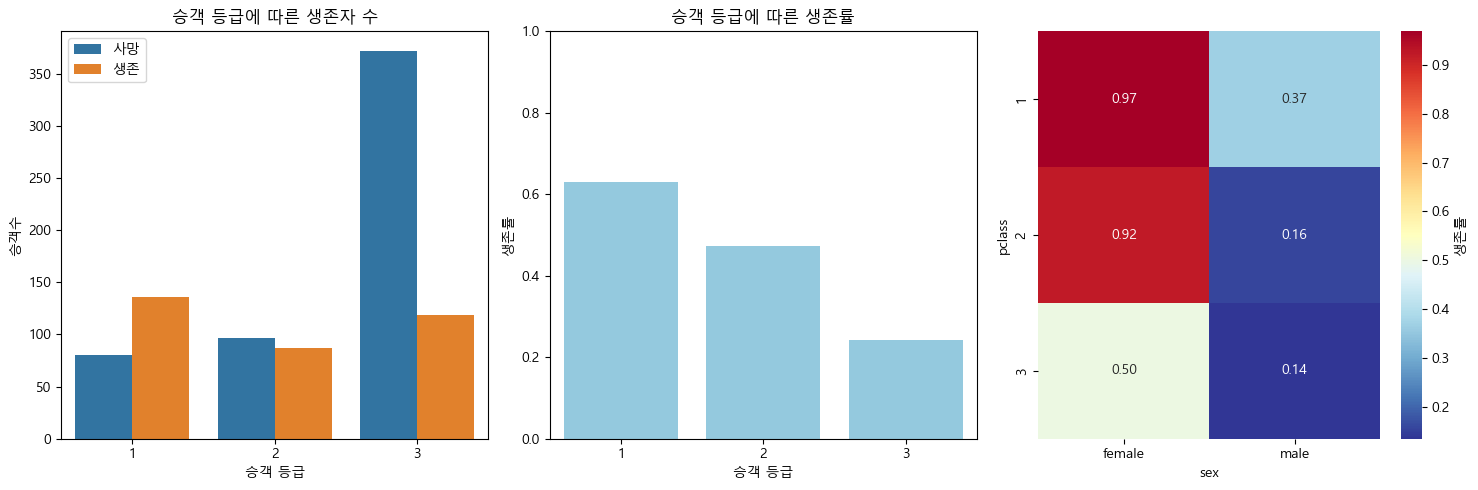

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(15,5))

#등급별 생존자 수 >> 그래프 보기 >> 1등급 생존자 제일 많음, 2-3 등급은 이상?
sns.countplot(data = df, x='pclass', hue= "survived", ax = axes[0])
axes[0].set_title("승객 등급에 따른 생존자 수")
axes[0].set_xlabel("승객 등급")
axes[0].set_ylabel("승객수")
axes[0].legend(labels=["사망", "생존"])

# 등급별 생존률
pclass_survived = df.groupby("pclass")["survived"].mean().reset_index() ## 여기도 다시 이해하기 groupby =>> 집계함수
sns.barplot( data=pclass_survived, x='pclass', y= "survived", ax = axes[1], color = "skyblue")
axes[1].set_title("승객 등급에 따른 생존률")
axes[1].set_xlabel("승객 등급")
axes[1].set_ylabel("생존률")
axes[1].set_ylim(0,1)

# 등급과 성별 교차율
cross_tab = pd.crosstab(df["pclass"], df["sex"], values=df["survived"], aggfunc="mean") # crosstab 
sns.heatmap(cross_tab, ax = axes[2], annot=True, fmt=".2f", cmap="RdYlBu_r", cbar_kws={"label" : "생존률"}) # sns.heatmap()

plt.tight_layout()
plt.show()

In [ ]:
# https://wikidocs.net/154073 **피벗변환 : 데이터의 열을 기준으로 피벗테이블로 변환
# https://koreadatascientist.tistory.com/12#google_vignette 판다스 **melt() : 컬럼을 녹여서 행으로 보냄

# 등급과 성별 교차율 by pandas crosstab 
pd.crosstab(df["pclass"], df["sex"], values=df["survived"], aggfunc="mean") # >> values, aggfunc 이해하기

sex,female,male
pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


### 3. 타이타닉 : 나이에 따른 생존률 분석
- 성별과 나이
- 전체 나이 분포
- 나이 그룹별 생존률
- 생존여부에 따른 나이 분포

In [36]:
df["age"] # >> 나이가 구분될 수 있을까?


0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

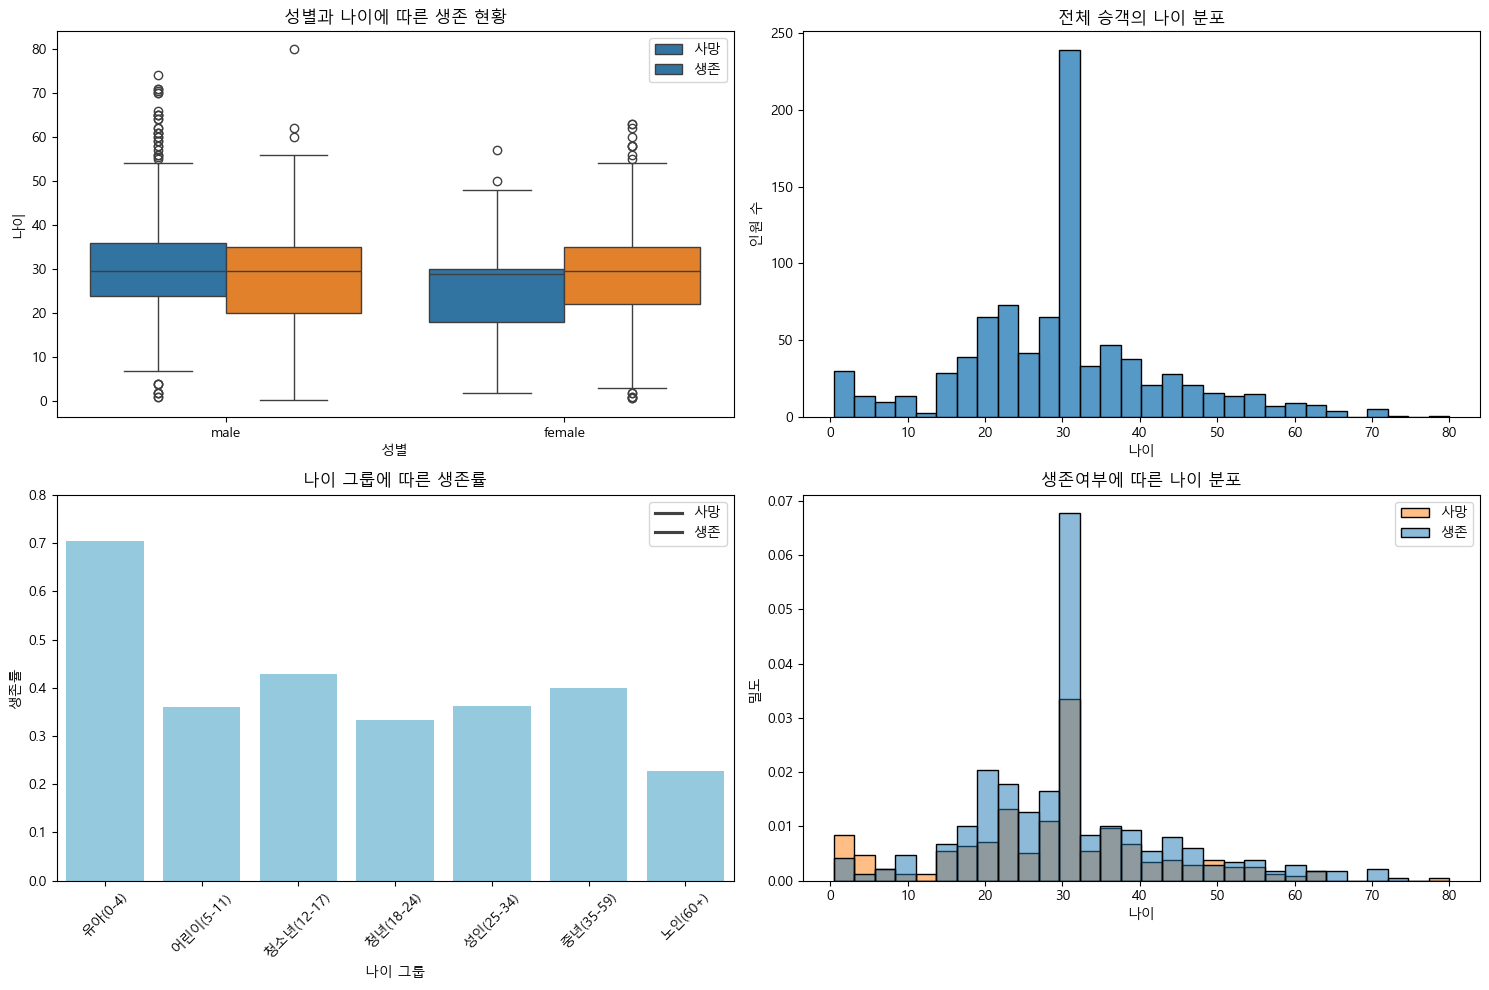

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(15,10))

## 성별과 나이
# https://newsjel.ly/archives/newsjelly-report/14177 boxplots()그래프
sns.boxplot(data = df, x = 'sex', y = 'age', hue = "survived", ax=axes[0,0]) 
# >> 그래프를 보면 30대를 벗어나는 남자가 여자에 비해 많음
# >> 성별별 나이의 평균보다 어린 남성과, 나이 많은 여성이 생존하는 경우가 많음 >> 그래프 해석이 필요함 
# >> 나이와 성별이 생존률에 가장 큰 영향을 미치는가? >> 좌석 등급이 더 큰 영향이 있지 않을까?
axes[0,0].set_title("성별과 나이에 따른 생존 현황")
axes[0,0].set_xlabel("성별")
axes[0,0].set_ylabel("나이")
axes[0,0].legend(labels=["사망", "생존"])

## 전체 나이 분포
sns.histplot(data = df, x = 'age', ax=axes[0,1]) 
axes[0,1].set_title("전체 승객의 나이 분포")
axes[0,1].set_xlabel("나이")
axes[0,1].set_ylabel("인원 수")
axes[0,0].legend(labels=["사망", "생존"])


## 나이 그룹별 생존률
# >> 나이분류 기준을 어떻게 선정할까? 내가 정함
# 유아(0-4) 어린이(5-11) 청소년(12-17) 청년(18-24) 성인(25-34) 중년(35-59) 노인(60+)
bins = [0,5,12,18,25,35,60, np.inf]
labels = ["유아(0-4)", "어린이(5-11)", "청소년(12-17)", "청년(18-24)", "성인(25-34)","중년(35-59)", "노인(60+)"]
df["age_group"] = pd.cut(df["age"],bins, labels=labels) # df에 "age_group" 열을 추가 

age_group_survived = df.groupby("age_group", observed=True)["survived"].mean().reset_index() ## 여기도 다시 이해하기 groupby =>> 집계함수
sns.barplot( data=age_group_survived, x='age_group', y= "survived", ax = axes[1,0], color = "skyblue")
axes[1,0].set_title("나이 그룹에 따른 생존률")
axes[1,0].set_xlabel("나이 그룹")
axes[1,0].set_ylabel("생존률")
axes[1,0].tick_params(axis='x', rotation = 45)
axes[1,0].legend(labels=["사망", "생존"])
axes[1,0].set_ylim(0,0.8)

## 생존여부에 따른 나이 분포
sns.histplot(data = df, x = 'age',hue="survived", stat="density", ax=axes[1,1])  # 누적막대그래프 by stat
axes[1,1].set_title("생존여부에 따른 나이 분포")
axes[1,1].set_xlabel("나이")
axes[1,1].set_ylabel("밀도")
axes[1,1].legend(labels=["사망", "생존"])

plt.tight_layout()
plt.show()

In [46]:
bins = [0,5,12,18,25,35,60, np.inf]
labels = ["유아", "어린이", "청소년", "청년", "성인","중년", "노년"]
pd.cut(df["age"],bins, labels=labels)

0      청년
1      중년
2      성인
3      성인
4      성인
       ..
886    성인
887    청년
888    성인
889    성인
890    성인
Name: age, Length: 891, dtype: category
Categories (7, object): ['유아' < '어린이' < '청소년' < '청년' < '성인' < '중년' < '노년']

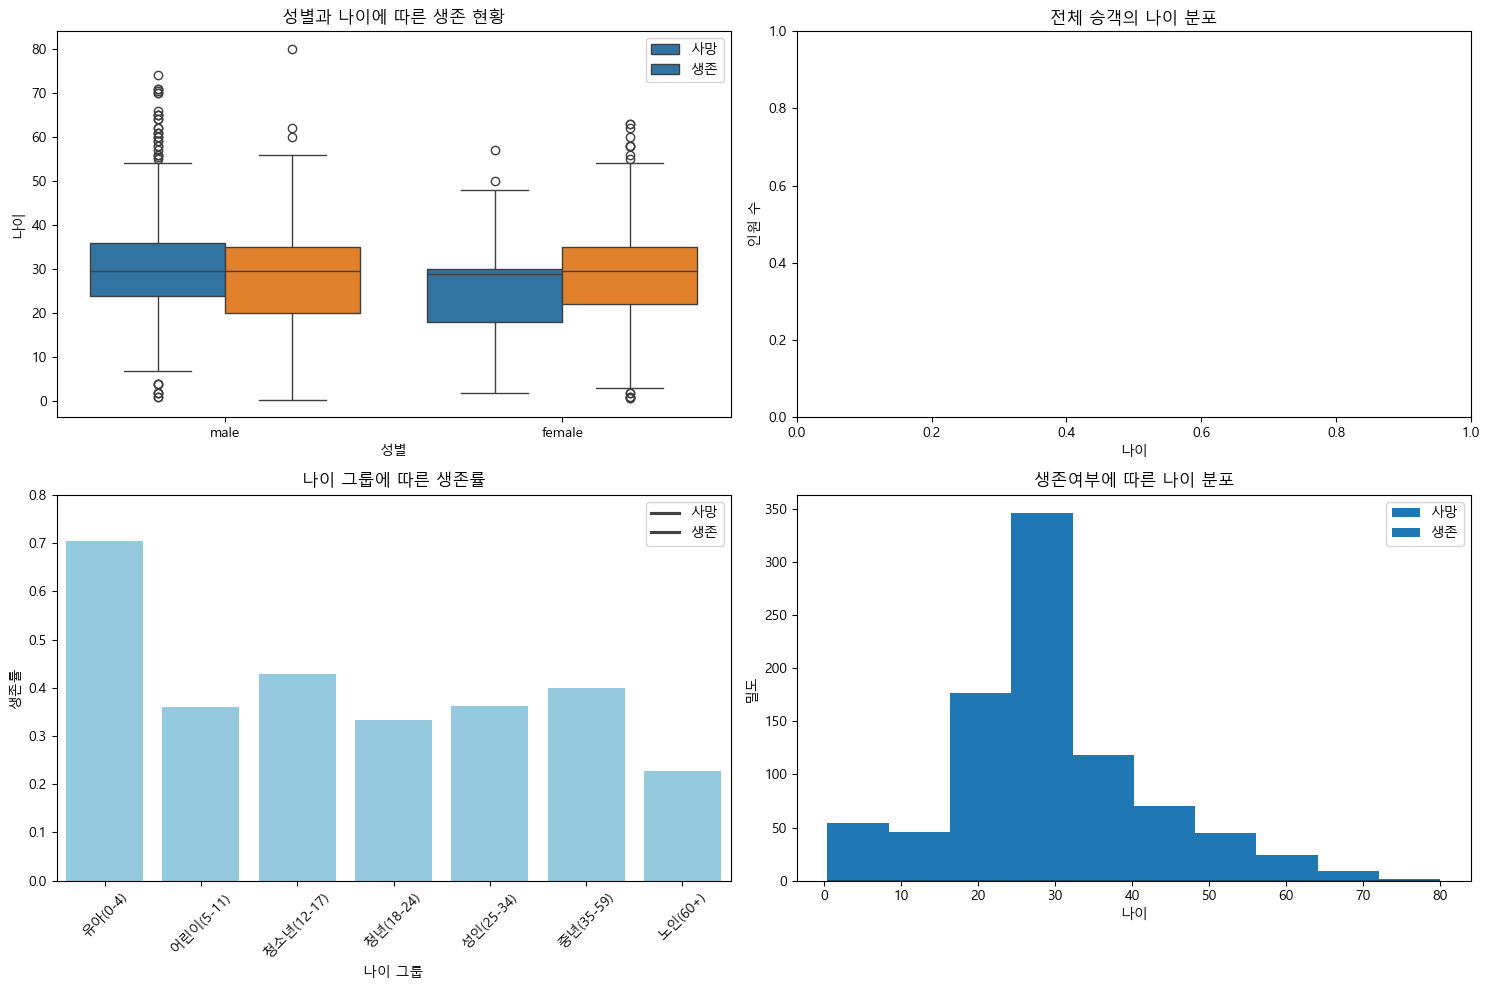

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(15,10))

## 성별과 나이
# https://newsjel.ly/archives/newsjelly-report/14177 boxplots()그래프
sns.boxplot(data = df, x = 'sex', y = 'age', hue = "survived", ax=axes[0,0]) 
# >> 그래프를 보면 30대를 벗어나는 남자가 여자에 비해 많음
# >> 성별별 나이의 평균보다 어린 남성과, 나이 많은 여성이 생존하는 경우가 많음 >> 그래프 해석이 필요함 
# >> 나이와 성별이 생존률에 가장 큰 영향을 미치는가? >> 좌석 등급이 더 큰 영향이 있지 않을까?
axes[0,0].set_title("성별과 나이에 따른 생존 현황")
axes[0,0].set_xlabel("성별")
axes[0,0].set_ylabel("나이")
axes[0,0].legend(labels=["사망", "생존"])

## 전체 나이 분포
df["age"].plot(kind="hist", ) # 판다스로 그린 그래프 > 분석자가 전체적인 데이터를 볼 때 사용함 # matplotlib : 제출용(세부조정이 필요한 경우) # seaborn : 분석자들끼리 데이터 연구시에 사용
axes[0,1].set_title("전체 승객의 나이 분포")
axes[0,1].set_xlabel("나이")
axes[0,1].set_ylabel("인원 수")
axes[0,0].legend(labels=["사망", "생존"])


## 나이 그룹별 생존률
# >> 나이분류 기준을 어떻게 선정할까? 내가 정함
# 유아(0-4) 어린이(5-11) 청소년(12-17) 청년(18-24) 성인(25-34) 중년(35-59) 노인(60+)
bins = [0,5,12,18,25,35,60, np.inf]
labels = ["유아(0-4)", "어린이(5-11)", "청소년(12-17)", "청년(18-24)", "성인(25-34)","중년(35-59)", "노인(60+)"]
df["age_group"] = pd.cut(df["age"],bins, labels=labels) # df에 "age_group" 열을 추가 

age_group_survived = df.groupby("age_group", observed=True)["survived"].mean().reset_index() ## 여기도 다시 이해하기 groupby =>> 집계함수
sns.barplot( data=age_group_survived, x='age_group', y= "survived", ax = axes[1,0], color = "skyblue")
axes[1,0].set_title("나이 그룹에 따른 생존률")
axes[1,0].set_xlabel("나이 그룹")
axes[1,0].set_ylabel("생존률")
axes[1,0].tick_params(axis='x', rotation = 45)
axes[1,0].legend(labels=["사망", "생존"])
axes[1,0].set_ylim(0,0.8)

## 생존여부에 따른 나이 분포
sns.histplot(data = df, x = 'age',hue="survived", stat="density", ax=axes[1,1])  # 누적막대그래프 by stat
axes[1,1].set_title("생존여부에 따른 나이 분포")
axes[1,1].set_xlabel("나이")
axes[1,1].set_ylabel("밀도")
axes[1,1].legend(labels=["사망", "생존"])

plt.tight_layout()
plt.show()

데이터(old) -> 전처리 ->    보고서 #1    -> 데이터(new) -> 예측 by                              
                        - 상관계수 확인                  1. 사람
                        - 데이터 이해                    2. 수학
                                                        3. 기계